In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import shift
from matplotlib.patches import Polygon
import matplotlib as mpl
import pandas as pd


import seaborn as sns
import statsmodels.formula.api as smf

import sklearn as sk
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import csv 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import metrics 
from sklearn import preprocessing
from sklearn.preprocessing import minmax_scale,scale,normalize
from scipy.spatial.distance import cdist 

from numpy import polyder

import math

import scipy as sc
from scipy import interpolate 


from PIL import ImageFilter
from PIL import Image, ImageDraw

In [2]:
# Read in our data and do some pre-processing 

filename1_raw = '4_4C_rzrb_L4 (2).h5'
h5_file1_raw = h5py.File(filename1_raw,'r')

filename2_raw = '4_4A_rzrb_L4 (2).h5'
h5_file2_raw = h5py.File(filename2_raw,'r')

filename3_raw = '52_8A_rzrb_L4 (1).h5'
h5_file3_raw = h5py.File(filename3_raw,'r')

filename4_raw = '12_3C_rzrb_L4 (1).h5'
h5_file4_raw = h5py.File(filename4_raw,'r')

filename5_raw = '46_12A_rzrb_L4 (1).h5'
h5_file5_raw = h5py.File(filename5_raw,'r')

filename6_raw = '5_8B_rzrb_L4 (1).h5'
h5_file6_raw = h5py.File(filename6_raw,'r')

filename7_raw = '5_8C_rzrb_L4 (1).h5'
h5_file7_raw = h5py.File(filename7_raw,'r')

filename8_raw = '1_7C_rzrb_L4 (1).h5'
h5_file8_raw = h5py.File(filename8_raw,'r')

filename9_raw = 'DS1_mouse_rzrb (1).h5'
h5_file9_raw = h5py.File(filename9_raw,'r')

filename10_raw = 'DS2_mouse_rzrb.h5'
h5_file10_raw = h5py.File(filename10_raw,'r')

filename11_raw = 'DS3_mouse_rzrb.h5'
h5_file11_raw = h5py.File(filename11_raw,'r')



file_list = [
            
            h5_file1_raw, h5_file2_raw, h5_file3_raw, h5_file4_raw, h5_file5_raw, h5_file6_raw,h5_file7_raw,
            h5_file8_raw,h5_file9_raw,h5_file10_raw,h5_file11_raw ]#[all names of h5's in here:]



all_h5_frame_list = []

for h5_file in file_list: 
        
        this_df_slices = []
        
        bins = np.arange(1,151,1)
        
        slice_list = list(h5_file)
        slice_list = slice_list[:-5]
        
        slice_count = 1 
        
        for slices in slice_list: 
             
            this_slice_signal = list(h5_file[slices]['signal']['postproc']['boxes']['means_autoscaled'])
        
            this_df = pd.DataFrame({'slice_number':slice_count, 'bin_number':bins, 'signal':this_slice_signal})
            
            this_df_slices.append(this_df)
                                   
            slice_count += 1
                                   
        
        one_file = pd.concat(this_df_slices)
        
        one_file_pivot = one_file.pivot('bin_number','slice_number','signal') 
        
        all_h5_frame_list.append(one_file_pivot)
        
                        

# Transform our maps so they are all the same size

In [3]:
from skimage.transform import resize

reshaped_maps = [] 
    
for maps in all_h5_frame_list:
    this_map = maps.values
    resized_map = resize(this_map,(150,55)) 
    reshaped_maps.append(resized_map)

<AxesSubplot:>

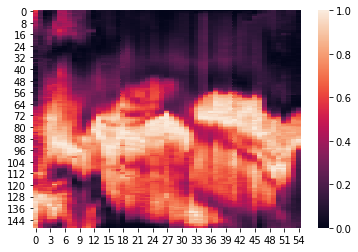

In [4]:
# test out a few to check and make sure it works: 
sns.heatmap(reshaped_maps[6])
#plt.savefig('nnrs_5_8C_rzrb.png')

In [5]:
# Flatten our 2D arrays 

d_frame1_flatten_bins = reshaped_maps[0].flatten()
d_frame2_flatten_bins = reshaped_maps[1].flatten()
d_frame3_flatten_bins = reshaped_maps[2].flatten()
d_frame4_flatten_bins = reshaped_maps[3].flatten()
d_frame5_flatten_bins = reshaped_maps[4].flatten()
d_frame6_flatten_bins = reshaped_maps[5].flatten()
d_frame7_flatten_bins = reshaped_maps[6].flatten()
d_frame8_flatten_bins = reshaped_maps[7].flatten()
d_frame9_flatten_bins = reshaped_maps[8].flatten()
d_frame10_flatten_bins = reshaped_maps[9].flatten()
d_frame11_flatten_bins = reshaped_maps[10].flatten()

In [6]:
# Stitch together our DataFrame, we've excluded DataFrame 4 as it appears to be an outlier 
# You can include it, and see what it does to our clustering results!
one_d_frame = pd.DataFrame({
'1':d_frame1_flatten_bins,
'2':d_frame2_flatten_bins,
'3':d_frame3_flatten_bins, 
'5':d_frame5_flatten_bins,
'6':d_frame6_flatten_bins,
'7':d_frame7_flatten_bins, 
'8':d_frame8_flatten_bins,
'9':d_frame9_flatten_bins,
'10':d_frame10_flatten_bins,
'11':d_frame11_flatten_bins,})


one_d_t = one_d_frame.T

one_d_values = one_d_t.values

# Apply scaling
#scaler= sk.preprocessing.MinMaxScaler()
scaler =sk.preprocessing.StandardScaler()
#scaler = sk.preprocessing.RobustScaler()
#scaler = sk.preprocessing.Normalizer()
dataset_scaled = scaler.fit_transform(one_d_values)

In [7]:
pca=PCA(n_components=5)
pca_result = pca.fit_transform(dataset_scaled)
print(pca.explained_variance_)

[2131.51355938 1252.03369693 1215.78706724 1004.26213817  887.14651779]


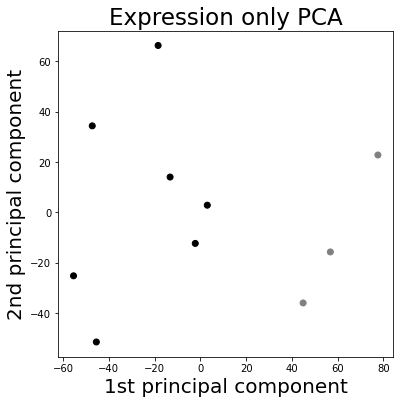

In [8]:
# Plot the 1st principal component aginst the 2nd and use the 3rd for the species

my_pal = ['black','black','black','black','black','black','black','gray','grey','grey']


fig, ax = plt.subplots(figsize=(6, 6))
#ax.scatter(pca_result[:, 0], pca_result[:, 1], c=pca_result[:, 1])
ax.scatter(pca_result[:, 0], pca_result[:, 1],c=my_pal)
ax.set_xlabel('1st principal component', fontsize=20)
ax.set_ylabel('2nd principal component', fontsize=20)
ax.set_title('Expression only PCA', fontsize=23)

fig.subplots_adjust(wspace=0.1, hspace=0.1)
#plt.savefig('nnrs_rzrb_pca.png')
plt.show()


In [9]:
# FROM https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,5) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(one_d_values) 
    kmeanModel.fit(one_d_values)     
      
    distortions.append(sum(np.min(cdist(one_d_values, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / one_d_values.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(one_d_values, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / one_d_values.shape[0] 
    mapping2[k] = kmeanModel.inertia_
    

for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val))

1 : 14.054607869199106
2 : 12.21241462090394
3 : 10.775801320271256
4 : 9.734743156958093


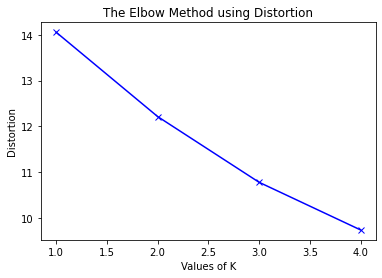

In [10]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [11]:
range_n_clusters = [2,3,4,5,6]

for i in range_n_clusters:
    clusterer = KMeans(n_clusters=i,random_state = 10)
    cluster_labels = clusterer.fit_predict(one_d_t)
    silhouette_avg = silhouette_score(one_d_t, cluster_labels)
    print('For',i,'clusters',
         'average silhouette score is:',silhouette_avg)
    

For 2 clusters average silhouette score is: 0.13687022871635607
For 3 clusters average silhouette score is: 0.11500336010482848
For 4 clusters average silhouette score is: 0.10964963538858603
For 5 clusters average silhouette score is: 0.10313024163241405
For 6 clusters average silhouette score is: 0.08732576738547566


In [12]:
kk = KMeans(n_clusters=2)
kk.fit(one_d_values)
y_kk= kk.predict(one_d_values)

result= kk.labels_
one_d_t['label']=result

In [13]:
one_d_t.label

1     0
2     1
3     1
5     1
6     0
7     0
8     0
9     1
10    1
11    1
Name: label, dtype: int32